In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
member_train_df = pd.read_csv('./data/train/1.회원정보/회원정보.tsv', header=0, sep='\t')
member_train_df.head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15


In [4]:
member_test_df = pd.read_csv('./data/test/1.회원정보/회원정보.tsv', header=0, sep='\t')
member_test_df.head()

,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TEST_00000,1,40대,1,1,0,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),45
1,201807,TEST_00001,1,60대,1,1,0,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀독립기,19
2,201807,TEST_00002,1,40대,1,1,1,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),5
3,201807,TEST_00003,2,40대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),7
4,201807,TEST_00004,2,40대,1,0,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),1


In [5]:
print('shape of train set in member: ', member_train_df.shape)
print('shape of test set in member: ', member_test_df.shape)

shape of train set in member:  (2400000, 78)
shape of test set in member:  (600000, 77)


In [6]:
# 값 중복 컬럼 추출
constant_columns_train = member_train_df.nunique() == 1
constant_columns_train = constant_columns_train[constant_columns_train].index.tolist()

print("Extract columns in having duplicated all values :\n", constant_columns_train)
print(f'{len(constant_columns_train)}개')

Extract columns in having duplicated all values :
 ['이용카드수_체크_가족', '이용금액_R3M_체크_가족', '연회비할인카드수_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']
9개


In [7]:
constant_columns_train

['이용카드수_체크_가족',
 '이용금액_R3M_체크_가족',
 '연회비할인카드수_B0M',
 '할인금액_기본연회비_B0M',
 '할인금액_제휴연회비_B0M',
 '상품관련면제카드수_B0M',
 '임직원면제카드수_B0M',
 '우수회원면제카드수_B0M',
 '기타면제카드수_B0M']

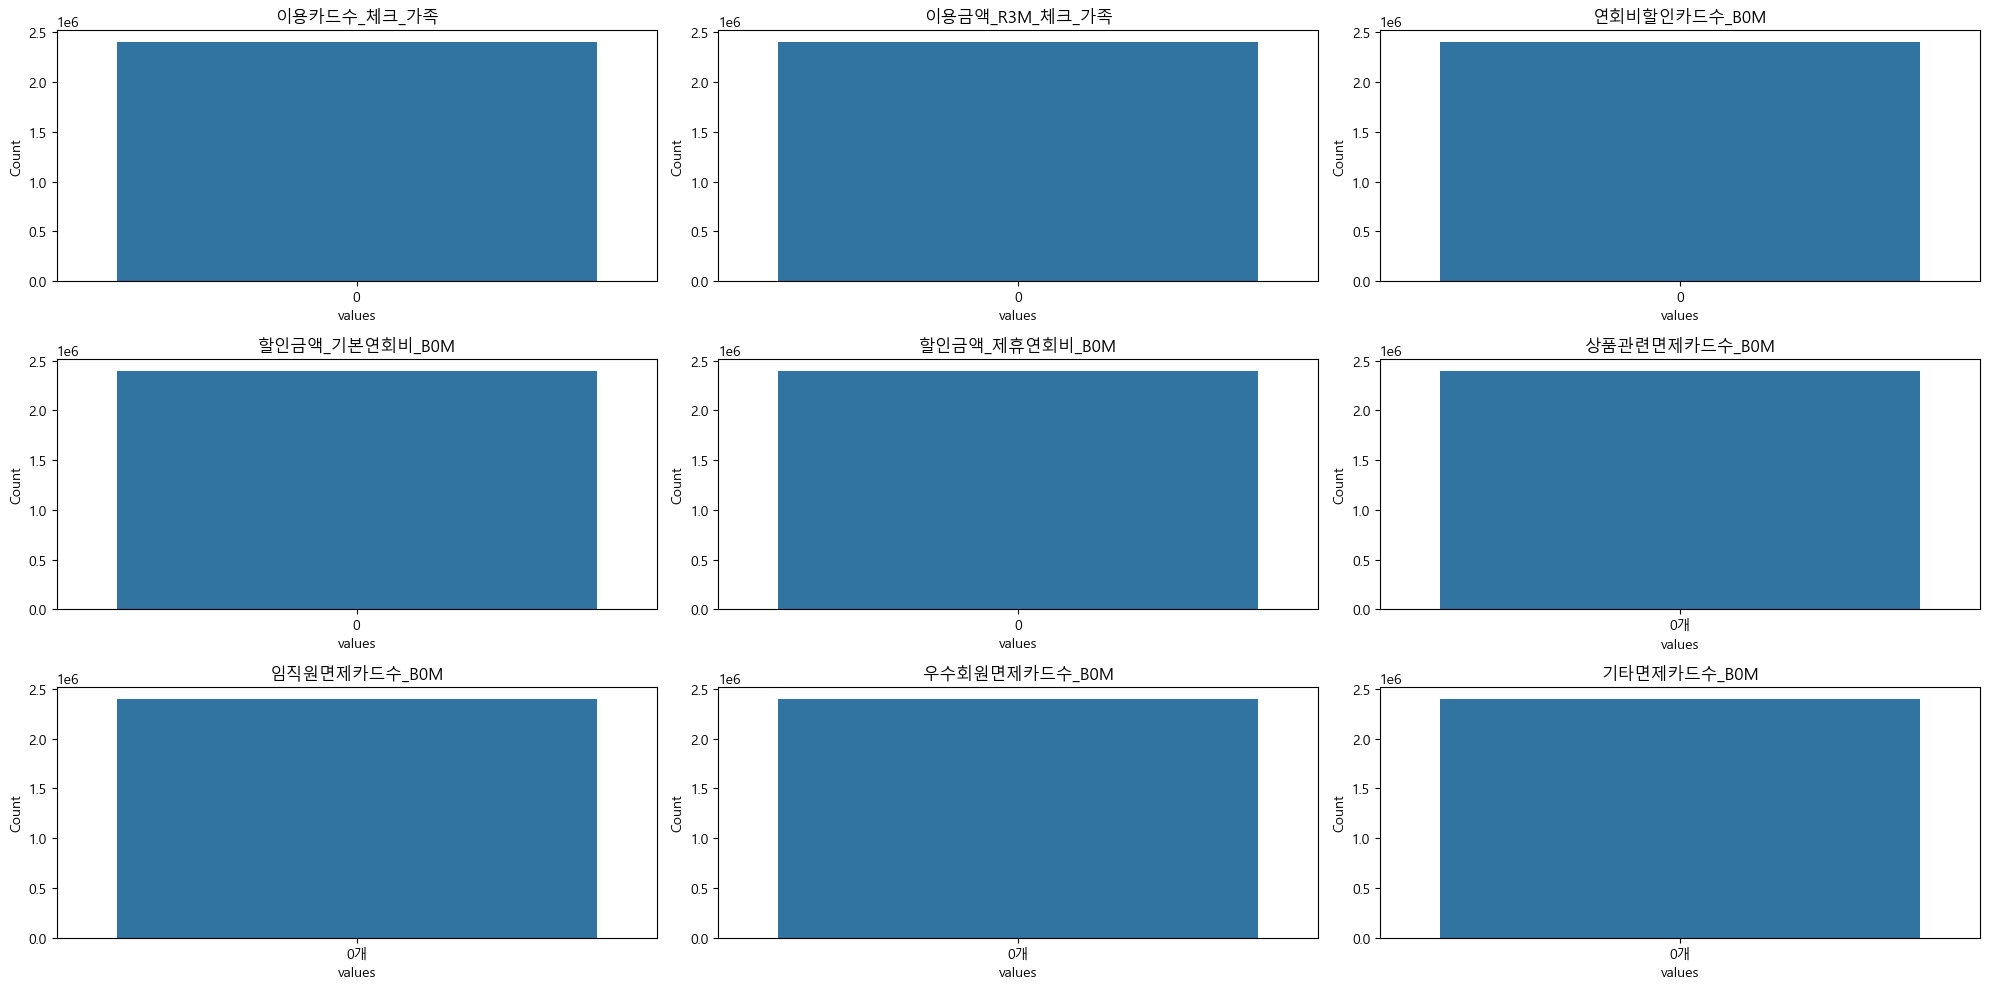

In [8]:
n_cols = 3
n_rows = math.ceil(len(constant_columns_train) / n_cols)  # num of maximum rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

for idx, col in enumerate(constant_columns_train):
    row, col_pos = divmod(idx, n_cols)
    sns.barplot(x=member_train_df[col].value_counts().index, 
                y=member_train_df[col].value_counts().values, 
                ax=axes[row, col_pos])
    axes[row, col_pos].set_title(col)
    axes[row, col_pos].set_xlabel('values')
    axes[row, col_pos].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [9]:
member_07_df = member_train_df[member_train_df['기준년월']==201807]
member_08_df = member_train_df[member_train_df['기준년월']==201807]
member_09_df = member_train_df[member_train_df['기준년월']==201807]
member_10_df = member_train_df[member_train_df['기준년월']==201807]
member_11_df = member_train_df[member_train_df['기준년월']==201807]
member_12_df = member_train_df[member_train_df['기준년월']==201807]

In [10]:
print(member_07_df.shape)
print(member_08_df.shape)
print(member_09_df.shape)
print(member_10_df.shape)
print(member_11_df.shape)
print(member_12_df.shape)

(400000, 78)
(400000, 78)
(400000, 78)
(400000, 78)
(400000, 78)
(400000, 78)


In [11]:
member_11_df

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,34
399996,201807,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),19
399997,201807,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,13
399998,201807,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),22


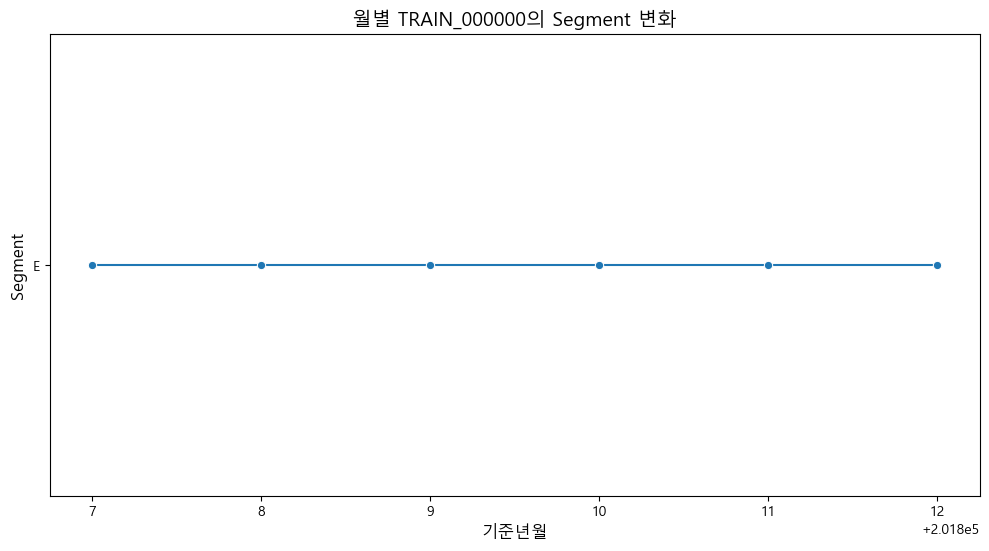

In [12]:
# 'TRAIN_000000'에 해당하는 데이터 필터링
train_000000_df = member_train_df[member_train_df['ID'] == 'TRAIN_000005']
train_000000_df = train_000000_df.sort_values(by='기준년월')


plt.figure(figsize=(12, 6))
sns.lineplot(x=train_000000_df['기준년월'], y=train_000000_df['Segment'], marker='o', linestyle='-')


plt.title("월별 TRAIN_000000의 Segment 변화", fontsize=14)
plt.xlabel("기준년월", fontsize=12)
plt.ylabel("Segment", fontsize=12)
plt.show()

In [13]:
member_08_df[member_train_df.groupby('ID')['Segment'].value_counts().values != 6]

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월


In [14]:
member_train_df.pivot_table(index='ID', columns='기준년월', values='Segment', aggfunc='first')

기준년월,201807,201808,201809,201810,201811,201812
ID,,,,,,
TRAIN_000000,D,D,D,D,D,D
TRAIN_000001,E,E,E,E,E,E
TRAIN_000002,C,C,C,C,C,C
TRAIN_000003,D,D,D,D,D,D
TRAIN_000004,E,E,E,E,E,E
...,...,...,...,...,...,...
TRAIN_399995,E,E,E,E,E,E
TRAIN_399996,D,D,D,D,D,D
TRAIN_399997,C,C,C,C,C,C


In [25]:
filtered_train_df = member_train_df.drop(columns=constant_columns_train, axis=1)
filtered_train_df.to_csv('./data/train/1.회원정보/회원정보_filtered.tsv', sep='\t', index=False)
filtered_test_df = member_test_df.drop(columns=constant_columns_train, axis=1)
filtered_test_df.to_csv('./data/test/1.회원정보/회원정보_filtered.tsv', sep='\t', index=False)

In [26]:
filtered_test_df.shape

(600000, 68)

In [27]:
filtered_train_df.shape

(2400000, 69)